In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from copy import deepcopy

In [142]:
data, _ = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=10)

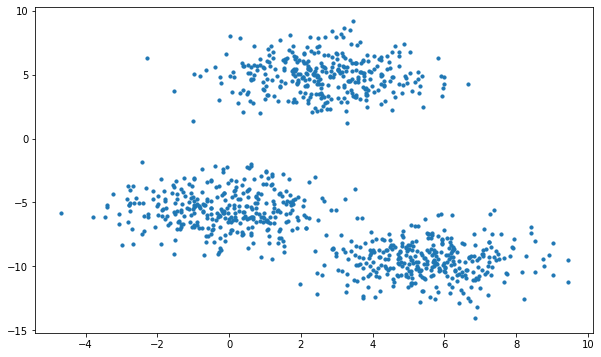

In [143]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], s = 10)
plt.show()

In [144]:
k = 3
centroid_x = np.random.randint(np.min(data), np.max(data), size = 3)
centroid_y = np.random.randint(np.min(data), np.max(data), size = 3)

In [145]:
centroids = np.array(list(zip(centroid_x, centroid_y)))

In [146]:
centroids

array([[  1, -11],
       [ -8,   5],
       [  2,  -6]])

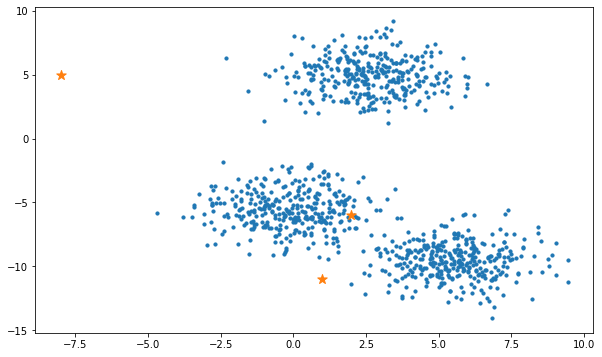

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(data[:, 0], data[:, 1], s = 10)
plt.scatter(centroid_x, centroid_y, s=100, marker = '*')
plt.show()

In [148]:
def euclidean_dist(a,b,axis=1):
    return np.linalg.norm(a - b, axis=axis)

In [149]:
centroids_old = np.zeros_like(centroids)

In [150]:
centroids_old

array([[0, 0],
       [0, 0],
       [0, 0]])

In [151]:
clusters = np.zeros(len(data))

In [152]:
def plotData(clusters, centroids):
    colors = ['r','g','b']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
        ax.scatter(points[:,0],points[:,1], s=10, c=colors[i])
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='purple')
    plt.show()

In [153]:
error = euclidean_dist(centroids, centroids_old, None)

In [154]:
error

15.84297951775486

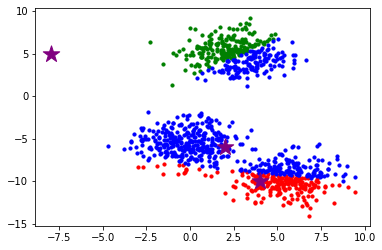

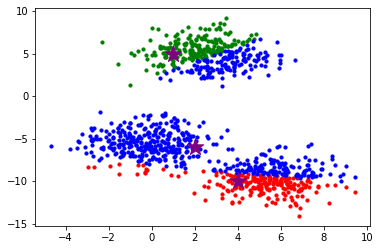

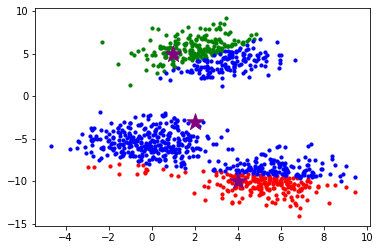

Iteration : 0, Error : 10.0


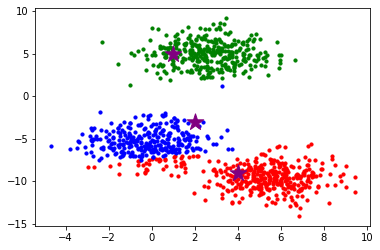

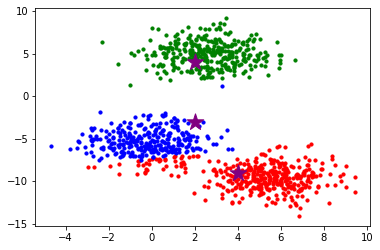

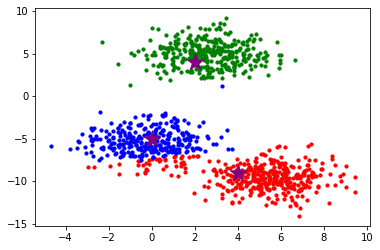

Iteration : 1, Error : 3.3166247903554


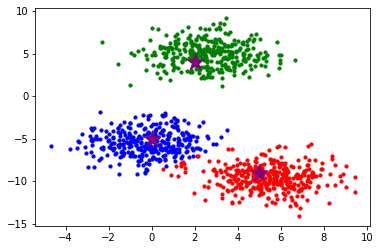

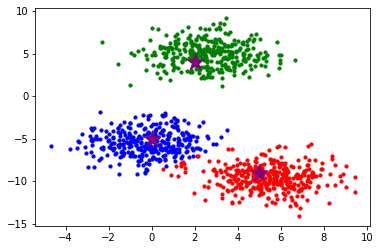

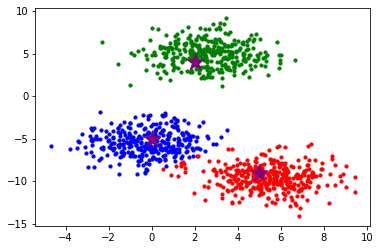

Iteration : 2, Error : 1.0


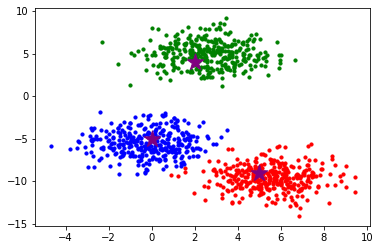

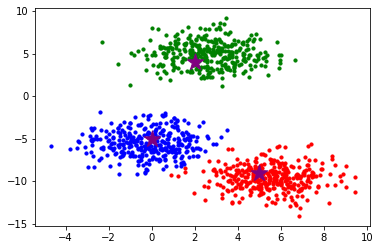

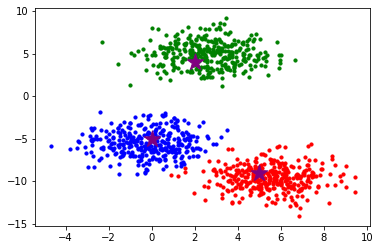

Iteration : 3, Error : 0.0


In [155]:
epochs = 0
while error != 0:
    for i in range(len(data)):
        distance = euclidean_dist(data[i], centroids)
        cluster = np.argmin(distance)
        clusters[i] = cluster
    
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
        plotData(clusters, centroids)
    error = euclidean_dist(centroids, centroids_old, None)
    print("Iteration : {}, Error : {}".format(epochs, error))
    epochs += 1